In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [20]:
reeses=cv2.imread('../DATA/reeses_puffs.png',0)

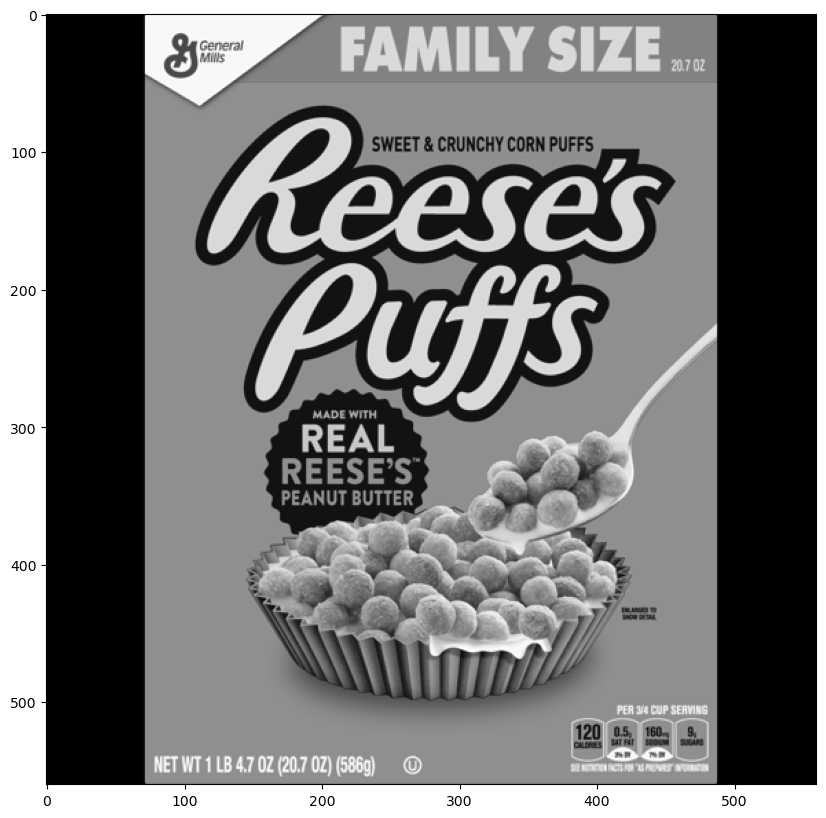

In [21]:
display(reeses)

In [22]:
cereals=cv2.imread('../DATA/many_cereals.jpg')


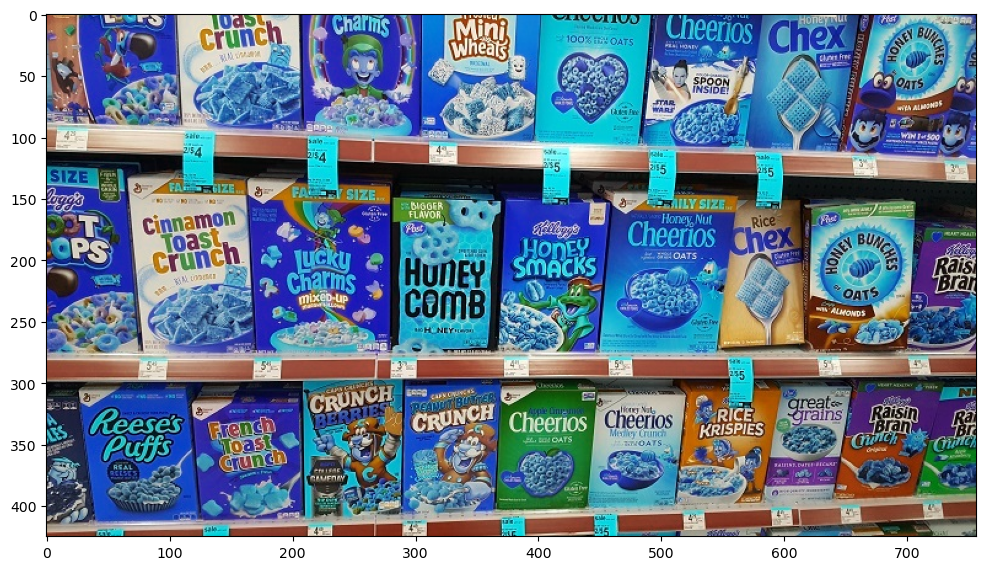

In [23]:
display(cereals)

# ORB

In [24]:
orb=cv2.ORB_create()

In [25]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [26]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [27]:
matches=bf.match(des1,des2)

In [28]:
matches=sorted(matches,key=lambda x: x.distance)

In [29]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

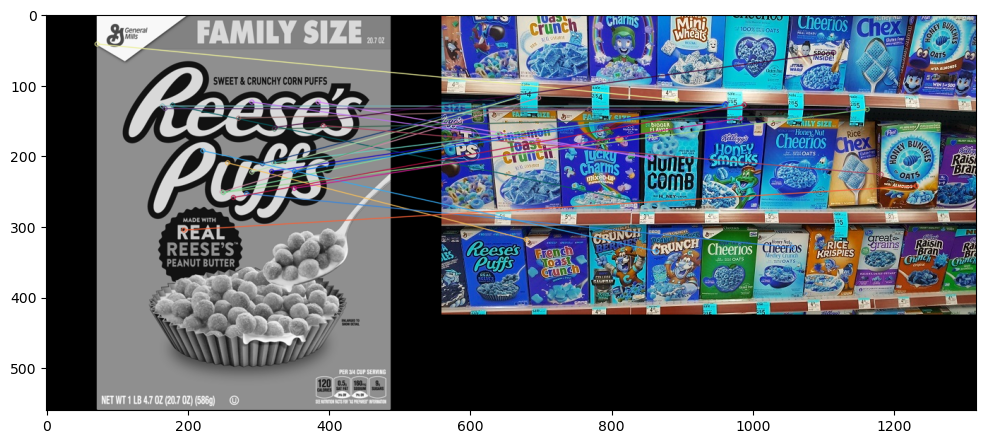

In [30]:
display(reeses_matches)

# SIFT= scale invariant feature transform

In [32]:
sift=cv2.SIFT_create()

In [34]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [35]:
bf=cv2.BFMatcher()

In [36]:
matches=bf.knnMatch(des1,des2,k=2)

In [60]:
good=[]
for match1,match2 in matches:
    #RATIO TEST
    #LESS DISTANCE=BETTER MATCH
    if match1.distance<0.75*match2.distance:
        good.append([match1])

In [61]:
len(good)

75

In [62]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

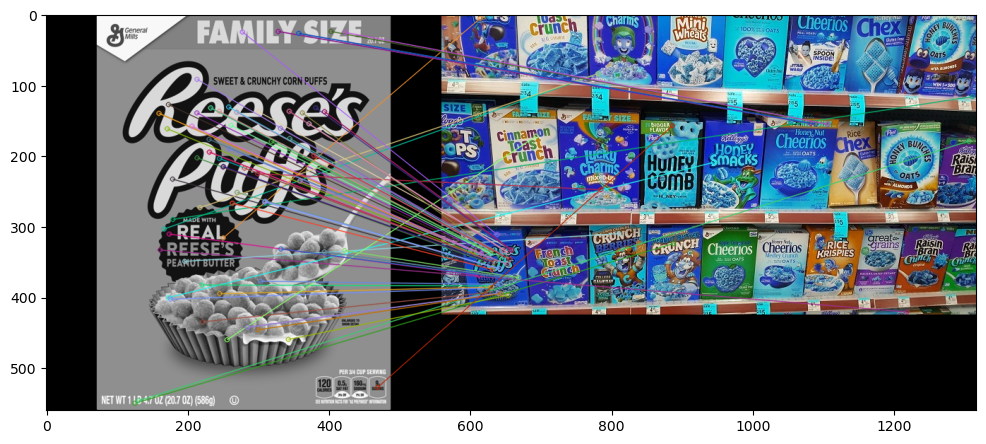

In [63]:
display(sift_matches)

# FLANN=Fast Library for N-nearest neighbour

In [80]:
sift=cv2.SIFT_create()

In [81]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [82]:
#FLANN PARAMETERS
FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [83]:
flann=cv2.FlannBasedMatcher(index_params,search_params)

In [86]:
matches=flann.knnMatch(des1,des2,k=2)

In [87]:
matchesMask=[[0,0] for i in range(len(matches))]

In [88]:
good=[]
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

In [91]:
draw_params=dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)

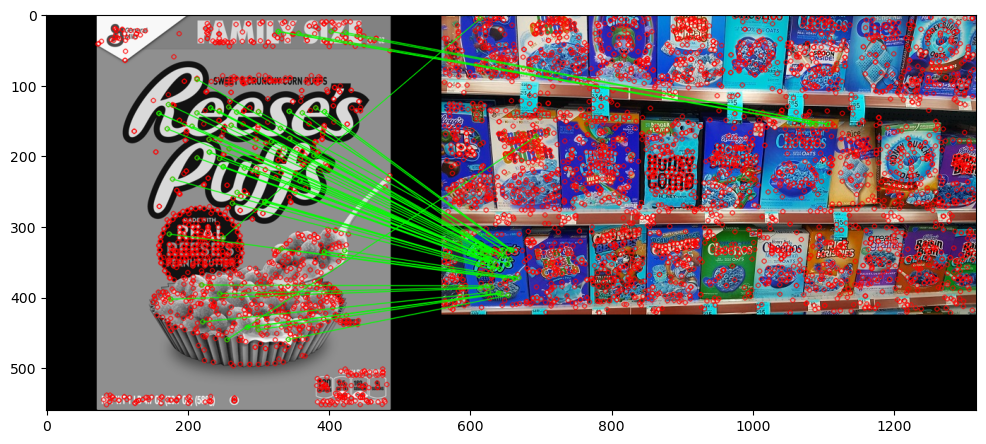

In [92]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)